## __k-means法の発展的手法__

- 手法

    - k-means++

    - k-medoids

    - x-means

    - g-means など

- 実装

    - PyClusteringというライブラリを使用

### __準備__

In [1]:
!pip install pyclustering | tail -n 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from pyclustering.cluster import cluster_visualizer

# ワインデータ
x = load_wine().data
x.shape

(178, 13)

In [3]:
# 可視化用にPCAで次元削減したデータも用意
pca = PCA(n_components=2)
x_2dim = pca.fit_transform(x)

# サイズ
print(x_2dim.shape)

# データの情報保持率
pca.explained_variance_ratio_

(178, 2)


array([0.99809123, 0.00173592])

### __Pyclusteringでクラスタリング__

- [Github](https://pyclustering.github.io/docs/0.9.0/html/d1/d2a/namespacepyclustering_1_1cluster.html)

- 基本的な使い方

    1.  `from pyclustering.cluster.〇〇 import 〇〇`でインポート

    2. インスタンス化

    3. `.process()`で実行

    4. `.predict()`か`.get_clusters()`で推論

    5. `cluster_visualizer()`で可視化

### __k-means++__

- k-meansの初期値の選び方を変えただけ

- 初期値が互いに遠く離れるように選ぶ

- `pyclustering.cluster.center_initializer.kmeans_plusplus_initializer`で実装

- 初期値の選び方だけ異なるので、他の発展的手法にも使える

In [4]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

k = 3 # クラスタ数
initial_centers = kmeans_plusplus_initializer(x, k).initialize()
initial_centers

[array([1.27e+01, 3.87e+00, 2.40e+00, 2.30e+01, 1.01e+02, 2.83e+00,
        2.55e+00, 4.30e-01, 1.95e+00, 2.57e+00, 1.19e+00, 3.13e+00,
        4.63e+02]),
 array([1.377e+01, 1.900e+00, 2.680e+00, 1.710e+01, 1.150e+02, 3.000e+00,
        2.790e+00, 3.900e-01, 1.680e+00, 6.300e+00, 1.130e+00, 2.930e+00,
        1.375e+03]),
 array([1.245e+01, 3.030e+00, 2.640e+00, 2.700e+01, 9.700e+01, 1.900e+00,
        5.800e-01, 6.300e-01, 1.140e+00, 7.500e+00, 6.700e-01, 1.730e+00,
        8.800e+02])]

### __k-medoids__

- 外れ値に強い

- k-means法では重心を計算するため、外れ値に弱いという問題がある


In [5]:
from pyclustering.cluster.kmedoids import kmedoids

# 初期値をランダムに決定
initial_medoids = np.random.randint(len(x), size=3)

# インスタンス化
kmedoids_instance = kmedoids(x, initial_medoids)

# 実行
kmedoids_instance.process()

# 推論
cluster_labels = kmedoids_instance.predict(x)
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [6]:
# クラスタに分割したインデックス
clusters = kmedoids_instance.get_clusters()

# 各クラスタの大きさ
for cluster in clusters:
    print(len(cluster))

63
47
68


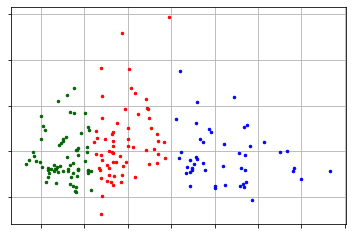

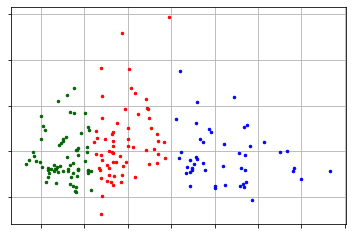

In [7]:
# 可視化
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, x_2dim)
visualizer.show()

### __x-means__

- BICに基づいて適切なクラスタ数を決めてくれる

In [8]:
from pyclustering.cluster.xmeans import xmeans

# インスタンス化
xmeans_instance = xmeans(x, initial_centers)

# 実行
xmeans_instance.process()

# 推論
cluster_labels = xmeans_instance.predict(x)
cluster_labels

array([15, 14, 12, 11, 19, 10,  9,  9, 14, 14, 11,  9,  9, 13, 11,  9,  9,
       13, 11, 17, 19, 19, 14, 14, 17, 17, 12,  9, 18, 14,  9, 11, 16,  9,
       15, 18, 18, 13, 14, 19, 17, 14, 15,  1, 18, 15, 15, 16, 15,  9, 13,
        9, 12, 10, 15, 13, 16,  9,  9,  4,  1,  5,  2,  6,  7,  1,  4,  4,
       19, 19, 18,  6,  5, 16, 18,  6,  7,  4, 19,  5,  8,  0,  2,  4,  4,
        5,  4,  3,  1,  2,  5,  5,  4,  8,  7, 16,  2,  6,  1,  6,  0,  3,
        6,  6,  1,  8,  4,  5,  8,  1,  3,  8,  2,  6,  7,  6,  4,  7,  7,
        3,  2,  5,  7,  7,  7,  7,  7,  5,  7,  3,  2,  4,  3,  2,  1,  0,
        0,  4,  3,  3,  2, 19,  4,  3, 17, 17,  6,  2,  1,  3,  4,  5,  6,
        1,  2,  0,  5, 18,  1,  2,  4,  1,  3,  1,  2,  4,  0,  1, 19,  2,
        4,  5,  1, 19, 19, 17, 17,  3])

In [9]:
# クラスタに分割したインデックス
xmeans_clusters = xmeans_instance.get_clusters()

# 各クラスタの大きさ
for cluster in xmeans_clusters:
    print(len(cluster))

6
15
14
12
17
12
11
12
5
13
2
5
3
5
8
7
5
8
7
11


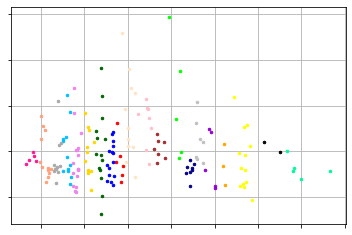

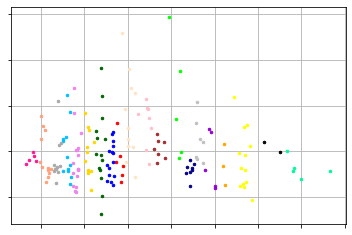

In [10]:
# 可視化
visualizer = cluster_visualizer()
visualizer.append_clusters(xmeans_clusters, x_2dim)
visualizer.show()

### __g-means__

- ガウス分布を仮定してクラスタ数を決めてくれる

In [11]:
from pyclustering.cluster.gmeans import gmeans

# インスタンス化
gmeans_instance = gmeans(x)

# 実行
gmeans_instance.process()

# 推論
cluster_labels = gmeans_instance.predict(x)
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [12]:
# クラスタに分割したインデックス
gmeans_clusters = gmeans_instance.get_clusters()

# 各クラスタの大きさ
for cluster in gmeans_clusters:
    print(len(cluster))

123
55


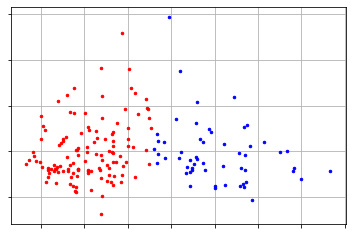

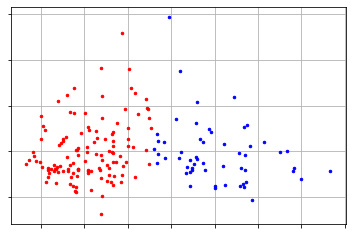

In [13]:
# 可視化
visualizer = cluster_visualizer()
visualizer.append_clusters(gmeans_clusters, x_2dim)
visualizer.show()